In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import mlrose_hiive as mlrose
import time
import matplotlib.pyplot as plt
import os
import gc
np.random.seed(903949505) 

In [22]:
def fuction_runner(fitness, size_range = range(10,100,10), max_attempts=100, restarts=10, RHC_init_state=None, GA_pop_size=100, GA_mutation_prob=0.2, SA_schedule=mlrose.GeomDecay(), SA_init_state=None, MIMIC_pop_size = 100, MIMIC_keep_pct=0.2):
    RHC=[]
    GA=[]
    SA=[]
    MIMIC=[]

    for size in size_range:
        print(size)
        gc.collect()
        
        problem_fit = mlrose.DiscreteOpt(length = size,fitness_fn = fitness,maximize = True,max_val = 2)

        st_time=time.time()
        RHC_curve = mlrose.random_hill_climb(problem_fit,restarts=10*size,max_attempts=max_attempts,max_iters=10*size,init_state=RHC_init_state,curve=True,random_state=903949505)
        et_time=time.time()
        RHC.append([size,et_time-st_time,RHC_curve[2][-1,0],RHC_curve[2][-1,1],RHC_curve[2][-1,1]/(et_time-st_time)])

        st_time=time.time()
        GA_curve = mlrose.genetic_alg(problem_fit,pop_size=10*size,mutation_prob=GA_mutation_prob,max_attempts=max_attempts,max_iters=10*size,curve=True,random_state=903949505)
        et_time=time.time()
        GA.append([size,et_time-st_time,GA_curve[2][-1,0],GA_curve[2][-1,1],GA_curve[2][-1,1]/(et_time-st_time)])

        st_time=time.time()
        SA_curve = mlrose.simulated_annealing(problem_fit,schedule=SA_schedule,max_attempts=max_attempts,init_state=SA_init_state,max_iters=1000,curve=True,random_state=42)
        et_time=time.time()
        SA.append([size,et_time-st_time,SA_curve[2][-1,0],SA_curve[2][-1,1],SA_curve[2][-1,1]/(et_time-st_time)])

        st_time=time.time()
        MIMIC_curve = mlrose.mimic(problem_fit,pop_size=10*size, keep_pct=MIMIC_keep_pct,max_attempts=max_attempts,max_iters=10*size,curve=True,random_state=903949505)
        et_time=time.time()
        MIMIC.append([size,et_time-st_time,MIMIC_curve[2][-1,0],MIMIC_curve[2][-1,1],MIMIC_curve[2][-1,1]/(et_time-st_time)])
        
    return RHC,RHC_curve,GA,GA_curve,SA,SA_curve,MIMIC,MIMIC_curve

In [23]:
def FittnessVsIterations_plotter(RHC_curve,GA_curve,SA_curve,MIMIC_curve,title="Fitness Value vs Iterations\n(Four Peaks)",h1 ='C:/Users/sagni/Documents/Personal Files/CS7641/Assignment2/Images/FitnessVsIterations_FourPeaks.png'):
    
    RHC_df = pd.DataFrame(RHC_curve[2][:,0])
    GA_df = pd.DataFrame(GA_curve[2][:,0])
    SA_df = pd.DataFrame(SA_curve[2][:500,0])
    MIMIC_df = pd.DataFrame(MIMIC_curve[2][:,0])
    df = pd.concat([RHC_df,GA_df,SA_df,MIMIC_df], ignore_index=True, axis=1)
    df.columns = ["RHC","GA","SA","MIMIC"]
    header = 24
    other_title = 18
    df[['GA']] = df[['GA']]
    df[['MIMIC']] = df[['MIMIC']]
    plt.clf()
    plt.figure(figsize=(12, 8))
    plt.gcf().set_facecolor('white')
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.set_facecolor('white')
    ax.set_facecolor('white')
    plt.plot(df[['SA']], color='green', marker='s', markersize=5, label='RHC', alpha=0.8)
    plt.plot(df[['GA']], color='orange', marker='o', markersize=5, label='GA', alpha=0.8)
    plt.plot(df[['RHC']], color='blue', marker='p', markersize=5, label='SA', alpha=0.8)
    plt.plot(df[['MIMIC']], color='red', marker='x', markersize=5, label='MIMIC', alpha=0.8)

    plt.xlabel('Iterations', fontsize=other_title)
    plt.ylabel('Fitness Value', fontsize=other_title)
    plt.title(title, fontsize=header)
    plt.legend(loc='upper right', frameon=True, edgecolor='black', facecolor='white', fontsize=other_title)
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True, length=4)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    spine_alpha = 0.5
    plt.gca().spines['top'].set_alpha(spine_alpha)
    plt.gca().spines['bottom'].set_alpha(spine_alpha)
    plt.gca().spines['left'].set_alpha(spine_alpha)
    plt.gca().spines['right'].set_alpha(spine_alpha)
    plt.grid(True, linestyle="dotted", alpha=0.45, color='black')
    plt.xticks(fontsize=other_title)
    plt.yticks(fontsize=other_title)
    plt.xlim(-20, 600)
    plt.savefig(h1, dpi=600)
    plt.show()

In [24]:
def FittnessVsProblemSize_plotter(RHC,GA,SA,MIMIC,title="Fitness Value vs Problem Size\n(Four Peaks)",h1 ='C:/Users/sagni/Documents/Personal Files/CS7641/Assignment2/Images/FitnessVsProblemSize_FourPeaks.png'):
    
    i=2
    RHC_df = pd.DataFrame(RHC)[i]
    GA_df = pd.DataFrame(GA)[i]
    SA_df = pd.DataFrame(SA)[i]
    MIMIC_df = pd.DataFrame(MIMIC)[i]
    df = pd.concat([RHC_df,GA_df,SA_df,MIMIC_df], ignore_index=True, axis=1)
    df.index=range(10,100,10)
    df.columns = ["RHC","GA","SA","MIMIC"]
    header = 24
    other_title = 18

    plt.clf()
    plt.figure(figsize=(12, 8))
    plt.gcf().set_facecolor('white')
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.set_facecolor('white')
    ax.set_facecolor('white')
    plt.plot(df[['SA']], color='green', marker='s', markersize=5, label='RHC', alpha=0.8)
    plt.plot(df[['GA']], color='orange', marker='o', markersize=5, label='GA', alpha=0.8)
    plt.plot(df[['GA']], color='blue', marker='p', markersize=5, label='SA', alpha=0.8)
    plt.plot(df[['MIMIC']], color='red', marker='x', markersize=5, label='MIMIC', alpha=0.8)

    plt.xlabel('Problem Size', fontsize=other_title)
    plt.ylabel('Fitness Value', fontsize=other_title)
    plt.title(title, fontsize=header)
    plt.legend(loc='upper left', frameon=True, edgecolor='black', facecolor='white', fontsize=other_title)
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True, length=4)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    spine_alpha = 0.5
    plt.gca().spines['top'].set_alpha(spine_alpha)
    plt.gca().spines['bottom'].set_alpha(spine_alpha)
    plt.gca().spines['left'].set_alpha(spine_alpha)
    plt.gca().spines['right'].set_alpha(spine_alpha)
    plt.grid(True, linestyle="dotted", alpha=0.45, color='black')
    plt.xticks(fontsize=other_title)
    plt.yticks(fontsize=other_title)
    plt.xlim(10,80)
    plt.savefig(h1, dpi=600)
    plt.show()

In [25]:
def FevalVsProblemSize_plotter(RHC,GA,SA,MIMIC,title="Funtion Evaluations vs Problem Size\n(Four Peaks)",h1 ='C:/Users/sagni/Documents/Personal Files/CS7641/Assignment2/Images/FuntionEvaluationsVsProblemSize_FourPeaks.png'):
    
    i=3
    RHC_df = pd.DataFrame(RHC)[i]
    GA_df = pd.DataFrame(GA)[i]
    SA_df = pd.DataFrame(SA)[i]
    MIMIC_df = pd.DataFrame(MIMIC)[i]
    df = pd.concat([RHC_df,GA_df,SA_df,MIMIC_df], ignore_index=True, axis=1)
    df.index=range(10,100,10)
    df.columns = ["RHC","GA","SA","MIMIC"]
    header = 24
    other_title = 18

    plt.clf()
    plt.figure(figsize=(12, 8))
    plt.gcf().set_facecolor('white')
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.set_facecolor('white')
    ax.set_facecolor('white')
    plt.plot(df[['RHC']], color='green', marker='s', markersize=5, label='RHC', alpha=0.8)
    plt.plot(df[['GA']], color='orange', marker='o', markersize=5, label='GA', alpha=0.8)
    plt.plot(df[['SA']], color='blue', marker='p', markersize=5, label='SA', alpha=0.8)
    plt.plot(df[['MIMIC']], color='red', marker='x', markersize=5, label='MIMIC', alpha=0.8)

    plt.xlabel('Problem Size', fontsize=other_title)
    plt.ylabel('Funtion Evaluations', fontsize=other_title)
    plt.title(title, fontsize=header)
    plt.legend(loc='upper left', frameon=True, edgecolor='black', facecolor='white', fontsize=other_title)
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True, length=4)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    spine_alpha = 0.5
    plt.gca().spines['top'].set_alpha(spine_alpha)
    plt.gca().spines['bottom'].set_alpha(spine_alpha)
    plt.gca().spines['left'].set_alpha(spine_alpha)
    plt.gca().spines['right'].set_alpha(spine_alpha)
    plt.grid(True, linestyle="dotted", alpha=0.45, color='black')
    plt.xticks(fontsize=other_title)
    plt.yticks(fontsize=other_title)
    plt.xlim(10,80)
    plt.savefig(h1, dpi=600)
    plt.show()

In [26]:
def TimeTakenVsProblemSize_plotter(RHC,GA,SA,MIMIC,title="Time Taken vs Problem Size\n(Four Peaks)",h1 ='C:/Users/sagni/Documents/Personal Files/CS7641/Assignment2/Images/TimeTakenVsProblemSize_FourPeaks.png'):
    
    i=1
    RHC_df = pd.DataFrame(RHC)[i]
    GA_df = pd.DataFrame(GA)[i]
    SA_df = pd.DataFrame(SA)[i]
    MIMIC_df = pd.DataFrame(MIMIC)[i]
    df = pd.concat([RHC_df,GA_df,SA_df,MIMIC_df], ignore_index=True, axis=1)
    df.index=range(10,100,10)
    df.columns = ["RHC","GA","SA","MIMIC"]
    header = 24
    other_title = 18

    plt.clf()
    plt.figure(figsize=(12, 8))
    plt.gcf().set_facecolor('white')
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.set_facecolor('white')
    ax.set_facecolor('white')
    plt.plot(df[['RHC']], color='green', marker='s', markersize=5, label='RHC', alpha=0.8)
    plt.plot(df[['GA']], color='orange', marker='o', markersize=5, label='GA', alpha=0.8)
    plt.plot(df[['SA']], color='blue', marker='p', markersize=5, label='SA', alpha=0.8)
    plt.plot(df[['MIMIC']], color='red', marker='x', markersize=5, label='MIMIC', alpha=0.8)

    plt.xlabel('Problem Size', fontsize=other_title)
    plt.ylabel('Time', fontsize=other_title)
    plt.title(title, fontsize=header)
    plt.legend(loc='upper left', frameon=True, edgecolor='black', facecolor='white', fontsize=other_title)
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True, length=4)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    spine_alpha = 0.5
    plt.gca().spines['top'].set_alpha(spine_alpha)
    plt.gca().spines['bottom'].set_alpha(spine_alpha)
    plt.gca().spines['left'].set_alpha(spine_alpha)
    plt.gca().spines['right'].set_alpha(spine_alpha)
    plt.grid(True, linestyle="dotted", alpha=0.45, color='black')
    plt.xticks(fontsize=other_title)
    plt.yticks(fontsize=other_title)
    plt.xlim(10,80)
    plt.savefig(h1, dpi=600)
    plt.show()

10
20
30
40
50
60
70
80
90


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

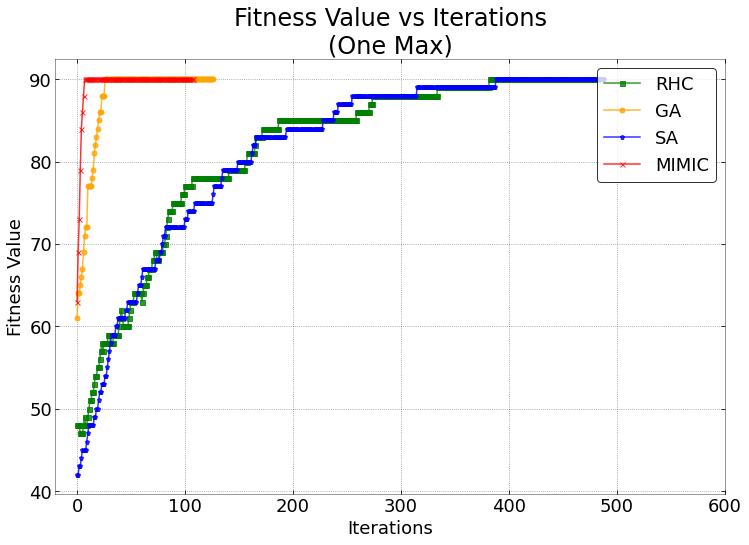

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

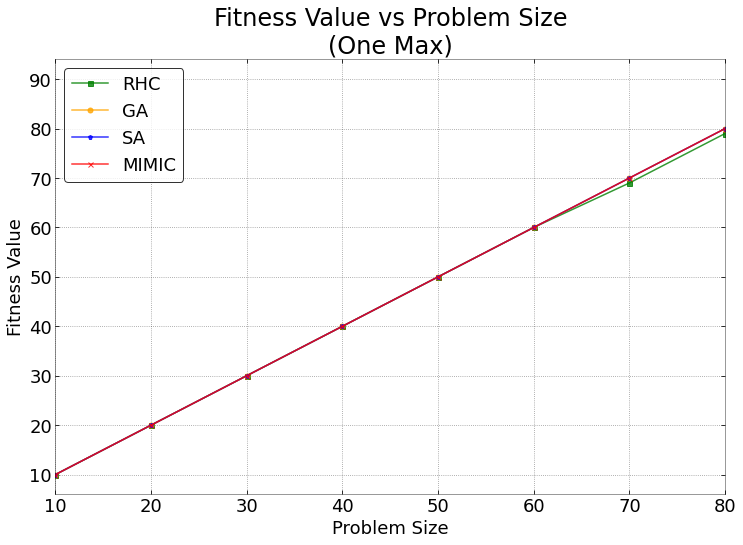

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

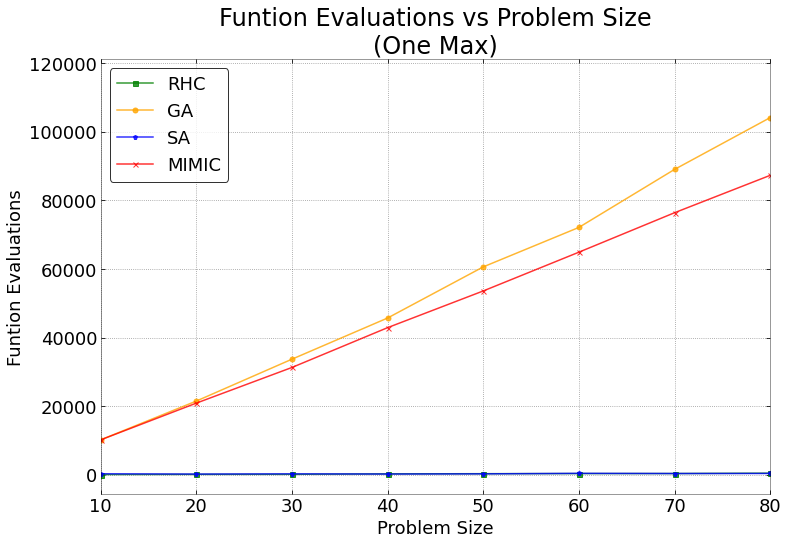

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

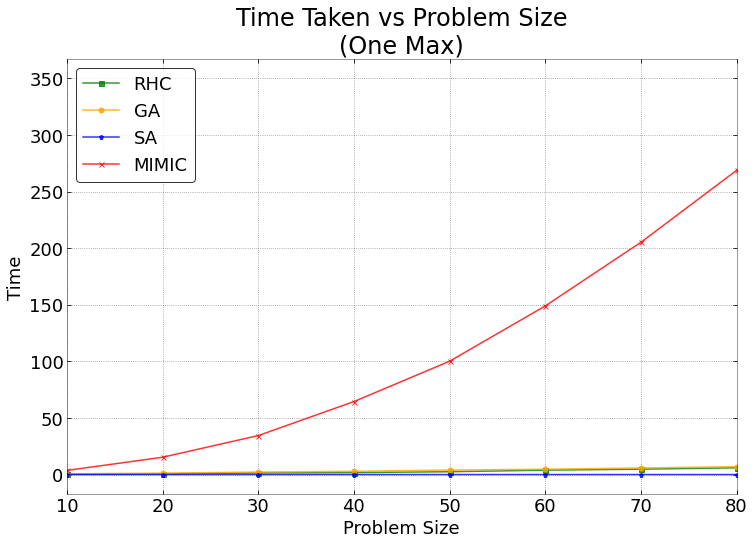

In [27]:
np.random.seed(42)
fitness = mlrose.OneMax()
RHC,RHC_curve,GA,GA_curve,SA,SA_curve,MIMIC,MIMIC_curve = fuction_runner(fitness, max_attempts=100)
FittnessVsIterations_plotter(RHC_curve,GA_curve,SA_curve,MIMIC_curve,title="Fitness Value vs Iterations\n(One Max)",h1 ='C:/Users/sagni/Documents/Personal Files/CS7641/Assignment2/Images/FitnessVsIterations_OneMax.png')
FittnessVsProblemSize_plotter(RHC,GA,SA,MIMIC,title="Fitness Value vs Problem Size\n(One Max)",h1 ='C:/Users/sagni/Documents/Personal Files/CS7641/Assignment2/Images/FitnessVsProblemSize_OneMax.png')
FevalVsProblemSize_plotter(RHC,GA,SA,MIMIC,title="Funtion Evaluations vs Problem Size\n(One Max)",h1 ='C:/Users/sagni/Documents/Personal Files/CS7641/Assignment2/Images/FuntionEvaluationsVsProblemSize_OneMax.png')
TimeTakenVsProblemSize_plotter(RHC,GA,SA,MIMIC,title="Time Taken vs Problem Size\n(One Max)",h1 ='C:/Users/sagni/Documents/Personal Files/CS7641/Assignment2/Images/TimeTakenVsProblemSize_OneMax.png')